In [1]:
import pandas as pd
import csv
import os
import numpy as np
import glob
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.ticker as plticker

## Base Extra

In [2]:
#Carregando o arquivo de ground truth
gd_truth = '../data/outputs/Videos-Emely-Extra/predicts_squeezenet/Videos-Emely-Extra-ground-truth.csv'
DF_GROUND_TRUTH = pd.read_csv(gd_truth, sep=";", index_col=None, usecols=['video_name', 'frame', 'ground truth'])
DF_GROUND_TRUTH.head(5)

,video_name,frame,ground truth
0,VID-20190313-WA0005,1,0
1,VID-20190313-WA0005,2,0
2,VID-20190313-WA0005,3,0
3,VID-20190313-WA0005,4,0
4,VID-20190313-WA0005,5,0


In [3]:
#Lista de unidades de ação passada por Emely
LABELS = [
    '0', '1', '2', '4', '5', '6', '7', '8', '9', 
    '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', 
    '20', '21', '22', '23', '24', '25', '26', '27', '28', 
    '31', '32', '33', '34', '35', '36', '37', 
    '41', '42', '43', '44', '45', '46', 
    '50', '51', '52', '53', '54', '55', '56', '57', '58', 
    '61', '62', '63', '64', 
    '70', '71', '72', '73', 
    '81'
]
print(len(LABELS))

59


In [4]:
def search(element, data):
    retorno = 0
    
    if(element in data):
        retorno = 1
    
    return retorno


def dict_generate(df_temp, data):
    thisdict = {}

    for c in df_temp.columns:
        thisdict[c] = search(c, data)

    return thisdict 


def generate_vector_y(y_true):
    
    #Criando uma lista com todas as unidades de ação
    y_true = y_true.split('+')
    
    #Criando um dataframe com colunas fixas, as colunas são as unidades de ação
    df_true = pd.DataFrame(columns=LABELS)
    
    #Gerando um dicionário de forma que para cada chave (unidade de ação) tenha 
    #   o valor 1 para indicar presença dessa unidade de ação e 0 para ausência.
    dict_y_true = dict_generate(df_true, y_true)
    
    #Criando uma lista dos valores das chaves dos dicionários
    #y_true = list(dict_y_true.values())
    df = pd.DataFrame([dict_y_true], columns=dict_y_true.keys())
    
    
    
    return df#dict_y_true



def generate_acc(y_true):
    y_true_formated = generate_vector_y(y_true)
    return y_true_formated
    

In [5]:
df_count = pd.DataFrame(columns=LABELS)

for index, row in DF_GROUND_TRUTH.iterrows():
    y_true_formated = generate_acc(row['ground truth'])
    df_count = df_count.append(y_true_formated, ignore_index = True)
    
df_count

Index(['0', '1', '2', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '31', '32', '33', '34', '35', '36', '37', '41', '42',
       '43', '44', '45', '46', '50', '51', '52', '53', '54', '55', '56', '57',
       '58', '61', '62', '63', '64', '70', '71', '72', '73', '81'],
      dtype='object')


,0,1,2,4,5,6,7,8,9,10,...,58,61,62,63,64,70,71,72,73,81
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
662,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
663,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
664,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
DF_GROUND_TRUTH.shape

(666, 3)

In [7]:
df_count.shape

(666, 59)

In [8]:
df_final = pd.concat([DF_GROUND_TRUTH, df_count], axis=1)
df_final.head(20)

,video_name,frame,ground truth,0,1,2,4,5,6,7,...,58,61,62,63,64,70,71,72,73,81
0,VID-20190313-WA0005,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,VID-20190313-WA0005,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,VID-20190313-WA0005,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,VID-20190313-WA0005,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,VID-20190313-WA0005,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,VID-20190313-WA0005,6,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,VID-20190313-WA0005,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,VID-20190313-WA0005,8,1+2,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,VID-20190313-WA0005,9,1+2,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,VID-20190313-WA0005,10,1+2,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_final_au = df_final[LABELS].copy()
df_final_au.columns = [f'au_{c}' for c in df_final_au]

df_final_au = df_final_au.sum(axis=0)

df_final_au = df_final_au.reset_index().rename(columns={"index": "au", 0: "total"})
df_final_au.head(6)

,au,total
0,au_0,73
1,au_1,265
2,au_2,117
3,au_4,116
4,au_5,10
5,au_6,0
6,au_7,0
7,au_8,0
8,au_9,0
9,au_10,1


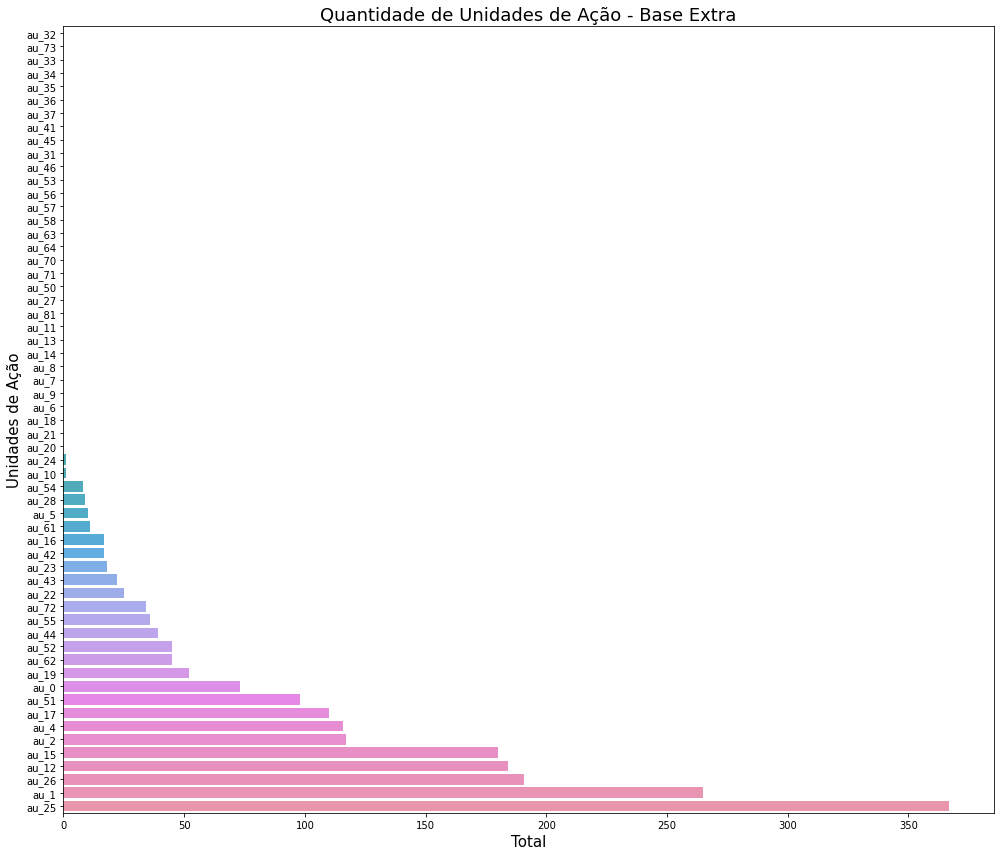

In [11]:
fig = plt.figure(figsize=(14,12))
sns.barplot(data=df_final_au,x="total", y="au", order=df_final_au.sort_values('total').au)

# set labels
plt.xlabel("Total", size=15)
plt.ylabel("Unidades de Ação", size=15)
plt.title("Quantidade de Unidades de Ação - Base Extra", size=18)
plt.tight_layout()
#plt.savefig("barplot_Seaborn_Python.png", dpi=100)

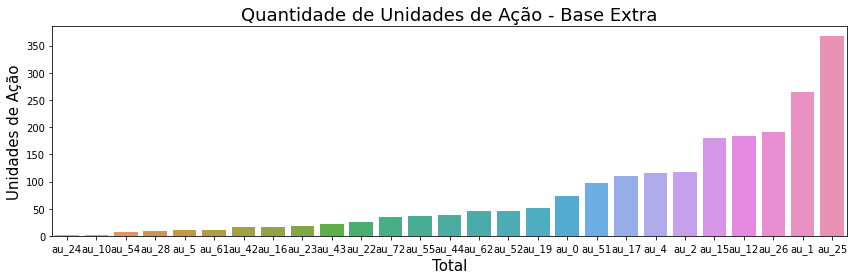

In [12]:
fig = plt.figure(figsize=(15,4))
data = df_final_au.loc[df_final_au.total != 0]
sns.barplot(data=data,y="total", x="au", order=data.sort_values('total').au)

# set labels
plt.xlabel("Total", size=15)
plt.ylabel("Unidades de Ação", size=15)
plt.title("Quantidade de Unidades de Ação - Base Extra", size=18)
plt.tight_layout()
#plt.savefig("barplot_Seaborn_Python.png", dpi=100)

## Base Tamires

In [13]:
#Carregando o arquivo de ground truth
gd_truth = '../data/outputs/Videos-Tamires-Selecionados/predicts_squeezenet/Videos-Tamires-Selecionados-ground-truth.csv'
DF_GROUND_TRUTH = pd.read_csv(gd_truth, sep=";", index_col=None, usecols=['video_name', 'frame', 'ground truth'])
DF_GROUND_TRUTH.head(5)

,video_name,frame,ground truth
0,RostoIntensidade-04Quarta-Sortudo,1,0
1,RostoIntensidade-04Quarta-Sortudo,2,0
2,RostoIntensidade-04Quarta-Sortudo,3,0
3,RostoIntensidade-04Quarta-Sortudo,4,25+26+42
4,RostoIntensidade-04Quarta-Sortudo,5,25+26+42


In [14]:
df_count = pd.DataFrame(columns=LABELS)

for index, row in DF_GROUND_TRUTH.iterrows():
    y_true_formated = generate_acc(row['ground truth'])
    df_count = df_count.append(y_true_formated, ignore_index = True)


df_final = pd.concat([DF_GROUND_TRUTH, df_count], axis=1)


df_final_au = df_final[LABELS].copy()
df_final_au.columns = [f'au_{c}' for c in df_final_au]

df_final_au = df_final_au.sum(axis=0)
df_final_au = df_final_au.reset_index().rename(columns={"index": "au", 0: "total"})
df_final_au.head(6)

,au,total
0,au_0,15
1,au_1,0
2,au_2,0
3,au_4,49
4,au_5,0
5,au_6,0
6,au_7,0
7,au_8,0
8,au_9,35
9,au_10,7


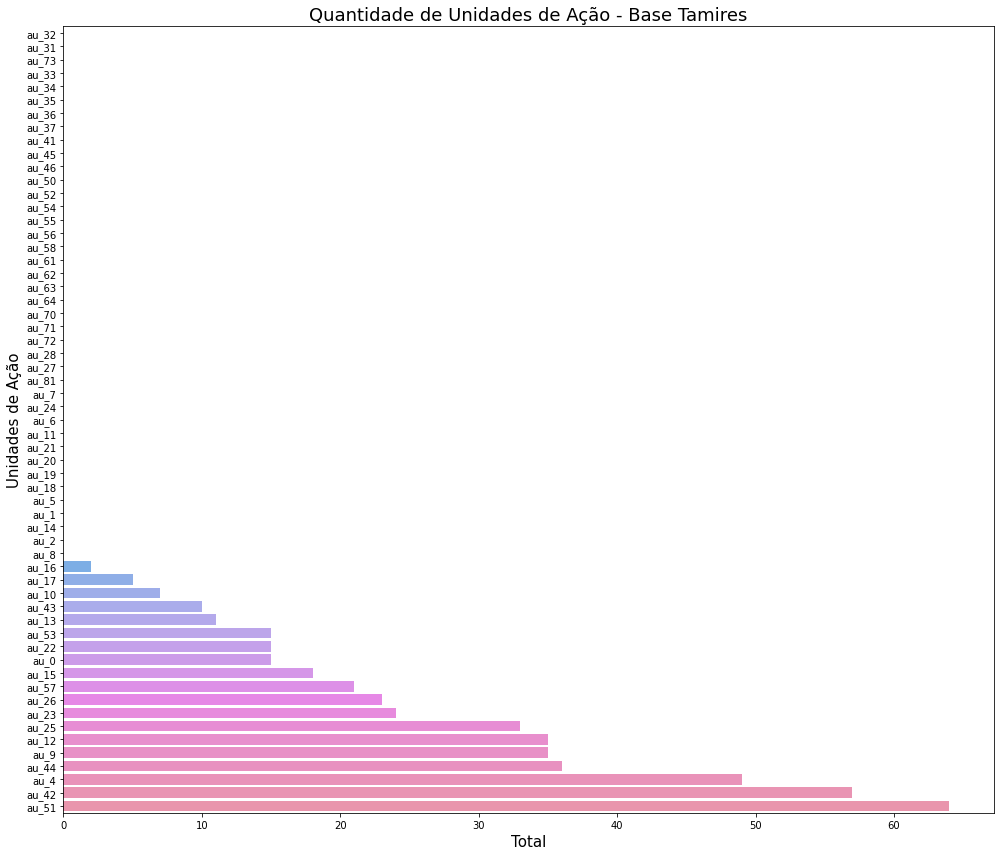

In [15]:
fig = plt.figure(figsize=(14,12))
sns.barplot(data=df_final_au,x="total", y="au", order=df_final_au.sort_values('total').au)

# set labels
plt.xlabel("Total", size=15)
plt.ylabel("Unidades de Ação", size=15)
plt.title("Quantidade de Unidades de Ação - Base Tamires", size=18)
plt.tight_layout()
#plt.savefig("barplot_Seaborn_Python.png", dpi=100)

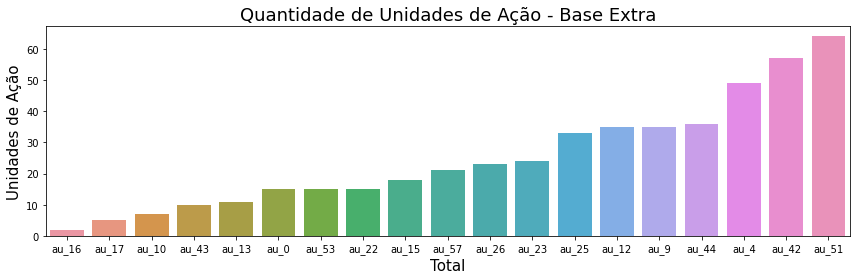

In [16]:
fig = plt.figure(figsize=(15,4))
data = df_final_au.loc[df_final_au.total != 0]
sns.barplot(data=data,y="total", x="au", order=data.sort_values('total').au)

# set labels
plt.xlabel("Total", size=15)
plt.ylabel("Unidades de Ação", size=15)
plt.title("Quantidade de Unidades de Ação - Base Extra", size=18)
plt.tight_layout()
#plt.savefig("barplot_Seaborn_Python.png", dpi=100)